# Assignment 1: Neural Networks 

In [2]:
#from the provided base code on bCourses by Prof. Ramirez
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


class Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayerSize=3
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)
    
    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward(X)
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2
    

# 1.2 First Problem:  Understand the structure of a neural network

## a. Plot the cost vs iteration

In [3]:
#store the random data given in the base code

X=np.array(([3,5],[5,1],[10,1]),dtype=float)
y=np.array(([75],[80],[93]),dtype=float)

#standardizing the data
X=X/np.amax(X,axis=0)
y=y/100

#Setting an accuracy threshold 
accuracyThreshold = 0.01

In [4]:
#initializing Neural Network 
NN=Neural_Network()

#create a scalar for gradient descent 
scalar = 0.1

#store costFunction values in a list
cost_vals_scalar = []

#store iterations
iter_scalar = 0

#store initial costFunction value
initial_cost = NN.costFunction(X, y)
cost_val = initial_cost

In [5]:
#now, I will minimize the cost function to create the decreasing side of the parabolic
#graph by subracting the scalar from the weights until the cost value reaches the accuracy threshold. 

#until the cost function reaches the value of the threshold, 
#compute the cost function with the current iteration's arguments, then store it on the cost_vals_scalar3 list
#coninue training the network with back propogation to minimize the cost by adjusting the weights 
#move onto the next iteration and repeat

while (cost_val > accuracyThreshold):
    cost_val = NN.costFunction(X,y)
    cost_vals_scalar.append(cost_val)
    
    dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
    NN.W1 = NN.W1 - (scalar * dJdW1)
    NN.W2 = NN.W2 - (scalar * dJdW2)
    iter_scalar += 1

In [6]:
#next, I will maximize the cost function as to create the increasing side of the parabolic 
#graph by adding the scalar from the weights until the cost_val reaches the initial cost

while (cost_val < initial_cost):
    cost_val = NN.costFunction(X, y)
    cost_vals_scalar.append(cost_val)
    
    dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
    NN.W1 = NN.W1 + (scalar * dJdW1)
    NN.W2 = NN.W2 + (scalar * dJdW2)
    iter_scalar += 1

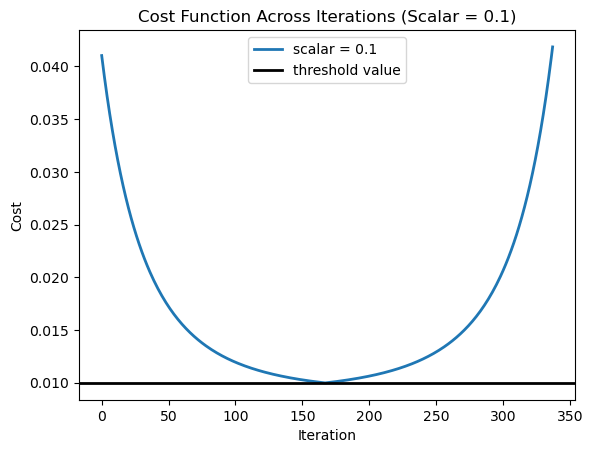

In [7]:
# plotting the cost function over each iteration to match the graph given
plt.plot(np.arange(iter_scalar), cost_vals_scalar, linewidth = 2)
plt.axhline(accuracyThreshold, linewidth = 2, color = "black")
plt.title('Cost Function Across Iterations (Scalar = 0.1)')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend(['scalar = 0.1','threshold value'])

### Findings
Above is a similar graph to the one drawn on the assignment page.

It visualizes the number of iterations it takes to train the neural network (minimize the cost by adjusting the weights). Additionally, the difference between adding and subtracting the scalar can be seen in the differences between the descending and ascending sides of the parabola. 

## b. Explore what happens if the learning rate is unusually large.


#### Comments
For the first graph, I used a learning rate (scalar) of size 0.1. A good learning is usually considered to be between 10**(-6) and 1.0. 

To explore what happens when the learning rate is unusually large, I will use a scalar of size 50. 

In [8]:

#initializing Neural Network 
NN=Neural_Network()

#create a scalar for gradient descent 
scalar_50 = 50

#store costFunction values in a list
cost_vals_scalar50 = []

#store iterations
iter_scalar50 = 0

#store initial costFunction value
initial_cost = NN.costFunction(X, y)
cost_val = initial_cost
#now, I will minimize the cost function to create the decreasing side of the parabolic
#graph by subracting the scalar from the weights until the cost value reaches the accuracy threshold. 


while (cost_val > accuracyThreshold):
    cost_val = NN.costFunction(X,y)
    cost_vals_scalar50.append(cost_val)
    #compute the cost function with the current iteration's arguments, then store it on the cost_vals_scalar3 list
    #coninue training the network with back propogation to minimize the cost by adjusting the weights 
    #move onto the next iteration and repeat
    dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
    NN.W1 = NN.W1 - (scalar_50 * dJdW1)
    NN.W2 = NN.W2 - (scalar_50 * dJdW2)
    iter_scalar50 += 1
#now, I will minimize the cost function to create the decreasing side of the parabolic
#graph by subracting the scalar from the weights until the cost value reaches the accuracy threshold. 

while (cost_val > accuracyThreshold):
    cost_val = NN.costFunction(X,y)
    cost_vals_scalar50.append(cost_val)
    #compute the cost function with the current iteration's arguments, then store it on the cost_vals_scalar3 list
    #coninue training the network with back propogation to minimize the cost by adjusting the weights 
    #move onto the next iteration and repeat
    dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
    NN.W1 = NN.W1 - (scalar_50 * dJdW1)
    NN.W2 = NN.W2 - (scalar_50 * dJdW2)
    iter_scalar50 += 1
#next, I will maximize the cost function as to create the increasing side of the parabolic 
#graph by adding the scalar from the weights until the cost_val reaches the initial cost

while (cost_val < initial_cost):
    cost_val = NN.costFunction(X, y)
    cost_vals_scalar50.append(cost_val)
    
    dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
    NN.W1 = NN.W1 + (scalar_50 * dJdW1)
    NN.W2 = NN.W2 + (scalar_50 * dJdW2)
    iter_scalar50 += 1


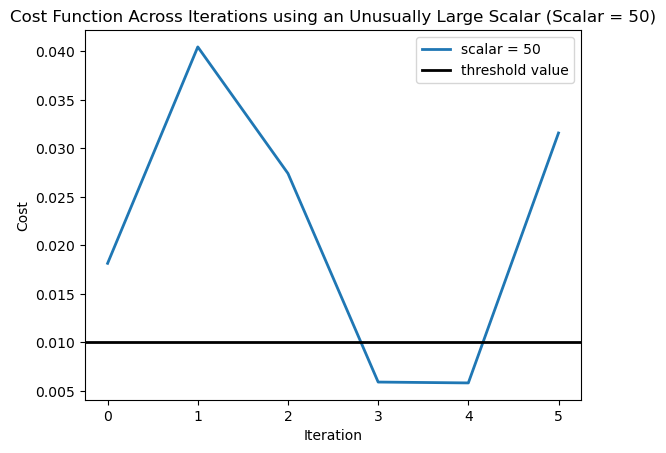

In [9]:
# plotting the cost function over each iteration to match the graph given
plt.plot(np.arange(iter_scalar50), cost_vals_scalar50, linewidth = 2)
plt.axhline(accuracyThreshold, linewidth = 2, color = "black")
plt.title('Cost Function Across Iterations using an Unusually Large Scalar (Scalar = 50)')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend(['scalar = 50','threshold value'])

### Findings
When the learning rate is unusually large, the network fails to converge and even overshoots the minimum, as seen in the erratic patterns of the gradient descent algorithm. 

# 1.3 Second Problem

## Use ReLu instead of sigmoid activation 

Use the ReLu activation function instead of the sigmoid function to construct a neural net of the same dimensions used in 1.2.


#### Comments
Beginning with the given base code, I will write a new Neural Network class that uses Relu in place of sigmoid for the activation function. ReLu refers to the Rectified Linear Unit, a simple mathematical function that returns the input value if it is positive, and returns zero otherwise (where x is the input to a neuron).

In [10]:
#defining a neural network using ReLu as the activation function

class Neural_Network_with_relu(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayerSize=3
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.relu(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)
    
    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward(X)
        delta3 = np.multiply(-(y-self.yHat),self.reluPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.reluPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2

In [11]:
#initalize the Neural Network that uses the sigmoid function first, 
NN=Neural_Network()

#assign the learning rate
scalar = 0.1

#store costFunction values in a list (to later compare with the NN using reLu)
cost_vals_relu_comparison = []

#store iterations
iter_relu_comparison = 0


initial_cost = NN.costFunction(X, y)
cost_val = initial_cost

while (cost_val > accuracyThreshold):
    cost_val = NN.costFunction(X,y)
    cost_vals_relu_comparison.append(cost_val)
    dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
    NN.W1 = NN.W1 - (scalar * dJdW1)
    NN.W2 = NN.W2 - (scalar * dJdW2)
    iter_relu_comparison += 1

In [12]:
#Next, initialize the neural net that uses the ReLu function. Go through the same steps as before.

NN = Neural_Network_with_relu()

scalar = 0.1

cost_vals_relu = []

iter_relu = 0

initial_cost = NN.costFunction(X, y)
cost_val = initial_cost

#now compute the cost function in the same way as above, but instead of a while loop, 
#iterate through the same number of iterations that the previous function took to complete its convergence

for i in np.arange(iter_relu_comparison):
    cost_val = NN.costFunction(X,y)
    cost_vals_relu.append(cost_val)
    dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
    NN.W1 = NN.W1 - (scalar * dJdW1)
    NN.W2 = NN.W2 - (scalar * dJdW2)
    iter_relu += 1

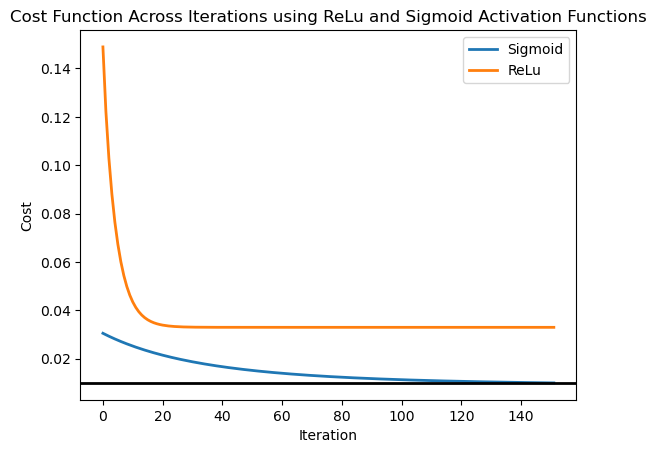

In [13]:
plt.plot(np.arange(iter_relu), cost_vals_relu_comparison, linewidth = 2)
plt.plot(np.arange(iter_relu), cost_vals_relu, linewidth = 2)
plt.axhline(accuracyThreshold, linewidth = 2, color = "black")
plt.title('Cost Function Across Iterations using ReLu and Sigmoid Activation Functions')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend(['Sigmoid','ReLu'])

### a. Compare how fast this neural network works with the one that uses the sigmoid function activation.

In order to compare the time that it took for each neural network to minimize the cost function, I first initialized the NN that uses the sigmoid function, stored the number of iterations required to meet the accuracy threshold value, then ran the NN using the relu function the same number of iterations. 

The graph depicts a couple key differences in the activation functions: 

**1.The relu function is faster (requires less iterations) to plateau**

**2.However, the point it plateaus is much before the desired accuracy function**

This suggests that the relu function, although quicker, does not do a good job training the network (minimizing cost by adjusting weights).

This could possibly be solved with the implementation of a varient of the relu function such as the leaky reLU or the ELU (exponential Liniar unit) function. Either function works to mitigate the possible issues that can arise with working with a relu function: 'dead' neurons, where the output of the neuron is always zero. This could possibly be what happened with this graph above.

### b. Add a new hidden layer and compare with the previous network.

In [14]:
#Here I am defining new networks with additional hidden layers. 
#I will reuse the code from previous section, but add lines as needed to implement the new hidden layer

class Neural_Network_Sigmoid_ExtraHiddenLayer(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayer1Size = 3
        self.hiddenLayer2Size = 3
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayer1Size)
        self.W2=np.random.rand(self.hiddenLayer1Size,self.hiddenLayer2Size)
        self.W3=np.random.rand(self.hiddenLayer2Size, self.outputLayerSize)
        
   

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        self.a3 = self.sigmoid(self.z3)
        #two additional lines needed for propogating through the additional hidden layer
        self.z4 = np.dot(self.a3, self.W3)
        yHat = self.sigmoid(self.z4)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)

    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2 and W3
        #additional lines here to account for the new W3
        self.yHat=self.forward(X)
        delta4 = np.multiply(-(y - self.yHat), self.sigmoidPrime(self.z4))
        dJdW3 = np.dot(self.a3.T, delta4)
        delta3 = np.dot(delta4, self.W3.T) * self.sigmoidPrime(self.z3)
        dJdW2=np.dot(self.a2.T, delta3)
        delta2=np.dot(delta3, self.W2.T) * self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T, delta2)
        return dJdW1, dJdW2, dJdW3

class Neural_Network_ReLu_ExtraHiddenLayer(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayer1Size = 3
        self.hiddenLayer2Size = 3
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayer1Size)
        self.W2=np.random.rand(self.hiddenLayer1Size,self.hiddenLayer2Size)
        self.W3=np.random.rand(self.hiddenLayer2Size, self.outputLayerSize)
        
   

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        self.a3 = self.relu(self.z3)
        # the two extra lines needed for propagating through an additional layer 
        self.z4 = np.dot(self.a3, self.W3)
        yHat = self.relu(self.z4)
        return yHat
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)

    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2 and W3
        self.yHat=self.forward(X)
        delta4 = np.multiply(-(y - self.yHat), self.reluPrime(self.z4))
        dJdW3 = np.dot(self.a3.T, delta4)
        delta3 = np.dot(delta4, self.W3.T) * self.reluPrime(self.z3)
        dJdW2=np.dot(self.a2.T, delta3)
        delta2=np.dot(delta3, self.W2.T) * self.reluPrime(self.z2)
        dJdW1=np.dot(X.T, delta2)
        return dJdW1, dJdW2, dJdW3

In [15]:
NN = Neural_Network_Sigmoid_ExtraHiddenLayer()

scalar = 0.1

cost_vals_sigmoid = []

iter_sigmoid_extra = 0

initial_cost = NN.costFunction(X, y)
cost_val = initial_cost

while (cost_val > accuracyThreshold):
    cost_val = NN.costFunction(X, y)
    cost_vals_sigmoid.append(cost_val[0])
    dCostdW1, dCostdW2, dCostdW3 = NN.costFunctionPrime(X, y)
    NN.W1 = NN.W1 - (scalar * dCostdW1)
    NN.W2 = NN.W2 - (scalar * dCostdW2)
    NN.W3 = NN.W3 - (scalar * dCostdW3)
    iter_sigmoid_extra += 1



In [16]:
NN = Neural_Network_ReLu_ExtraHiddenLayer()

scalar = 0.1

cost_vals_relu = []

for i in np.arange(iter_sigmoid_extra):
    cost_val = NN.costFunction(X, y)
    cost_vals_relu.append(cost_val[0])
    dCostdW1, dCostdW2, dCostdW3 = NN.costFunctionPrime(X, y)
    NN.W1 = NN.W1 - (scalar * dCostdW1)
    NN.W2 = NN.W2 - (scalar * dCostdW2)
    NN.W3 = NN.W3 - (scalar * dCostdW3)
    

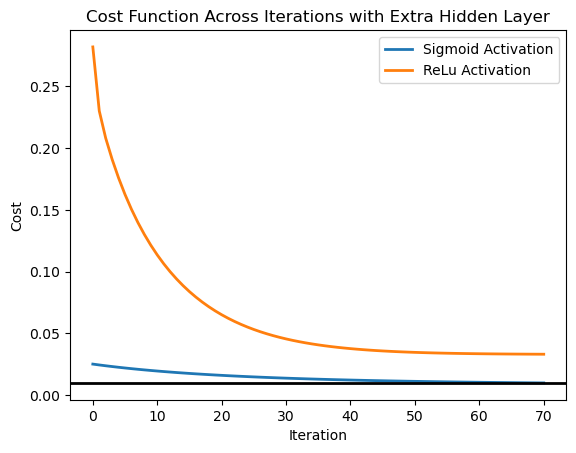

In [17]:
iterations = np.arange(iter_sigmoid_extra)
plt.plot(iterations, cost_vals_sigmoid, linewidth = 2,)
plt.plot(iterations, cost_vals_relu, linewidth = 2)
plt.title('Cost Function Across Iterations with Extra Hidden Layer')
plt.legend(['Sigmoid Activation', 'ReLu Activation'])
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.axhline(accuracyThreshold, linewidth = 2, color = "black")


#### Findings
Again, the Neural Net which uses the relu activation function plateaus much quicker (over fewer iterations) than the neural net uring the sigmoid function.

In fact, it seems to be plateauing at a higher cost than it was before. It can be concluded that adding an extra hidden layer worsened the performance of the network.

In comparison, the addition of a hidden layer made the neural network which used the sigmoid activation function perform much better. Before, the network required around 120 iterations before it converged with the accuracy threshold. Now, it is seen, to only require around 80 iterations. 

### b. Increase the numb er of hidden layer units to 10. Compare again.

In [44]:
#Here I am defining new networks with additional hidden layers. 
#I will reuse the code from previous section, but add lines as needed to implement the new hidden layer

class Neural_Network_Sigmoid_10HiddenLayers(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayer1Size = 3
        self.hiddenLayer2Size = 10
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayer1Size)
        self.W2=np.random.rand(self.hiddenLayer1Size,self.hiddenLayer2Size)
        self.W3=np.random.rand(self.hiddenLayer2Size, self.outputLayerSize)
        
   

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        self.a3 = self.sigmoid(self.z3)
        #two additional lines needed for propogating through the additional hidden layer
        self.z4 = np.dot(self.a3, self.W3)
        yHat = self.sigmoid(self.z4)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)

    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2 and W3
        #additional lines here to account for the new W3
        self.yHat=self.forward(X)
        delta4 = np.multiply(-(y - self.yHat), self.sigmoidPrime(self.z4))
        dJdW3 = np.dot(self.a3.T, delta4)
        delta3 = np.dot(delta4, self.W3.T) * self.sigmoidPrime(self.z3)
        dJdW2=np.dot(self.a2.T, delta3)
        delta2=np.dot(delta3, self.W2.T) * self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T, delta2)
        return dJdW1, dJdW2, dJdW3

class Neural_Network_ReLu_10HiddenLayers(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayer1Size = 3
        self.hiddenLayer2Size = 10
        
        #Define Weights 
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayer1Size)
        self.W2=np.random.rand(self.hiddenLayer1Size,self.hiddenLayer2Size)
        self.W3=np.random.rand(self.hiddenLayer2Size, self.outputLayerSize)
        
   

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        self.a3 = self.relu(self.z3)
        # the two extra lines needed for propagating through an additional layer 
        self.z4 = np.dot(self.a3, self.W3)
        yHat = self.relu(self.z4)
        return yHat
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)

    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2 and W3
        self.yHat=self.forward(X)
        delta4 = np.multiply(-(y - self.yHat), self.reluPrime(self.z4))
        dJdW3 = np.dot(self.a3.T, delta4)
        delta3 = np.dot(delta4, self.W3.T) * self.reluPrime(self.z3)
        dJdW2=np.dot(self.a2.T, delta3)
        delta2=np.dot(delta3, self.W2.T) * self.reluPrime(self.z2)
        dJdW1=np.dot(X.T, delta2)
        return dJdW1, dJdW2, dJdW3

In [45]:
NN = Neural_Network_Sigmoid_10HiddenLayers()

scalar = 0.1

cost_vals_sigmoid = []

iter_sigmoid_extra10 = 0

initial_cost = NN.costFunction(X, y)
cost_val = initial_cost

while (cost_val > accuracyThreshold):
    cost_val = NN.costFunction(X, y)
    cost_vals_sigmoid.append(cost_val[0])
    dCostdW1, dCostdW2, dCostdW3 = NN.costFunctionPrime(X, y)
    NN.W1 = NN.W1 - (scalar * dCostdW1)
    NN.W2 = NN.W2 - (scalar * dCostdW2)
    NN.W3 = NN.W3 - (scalar * dCostdW3)
    iter_sigmoid_extra10 += 1



In [46]:
NN = Neural_Network_ReLu_10HiddenLayers()

scalar = 0.1

cost_vals_relu = []

for i in np.arange(iter_sigmoid_extra10):
    cost_val = NN.costFunction(X, y)
    cost_vals_relu.append(cost_val[0])
    dCostdW1, dCostdW2, dCostdW3 = NN.costFunctionPrime(X, y)
    NN.W1 = NN.W1 - (scalar * dCostdW1)
    NN.W2 = NN.W2 - (scalar * dCostdW2)
    NN.W3 = NN.W3 - (scalar * dCostdW3)
    

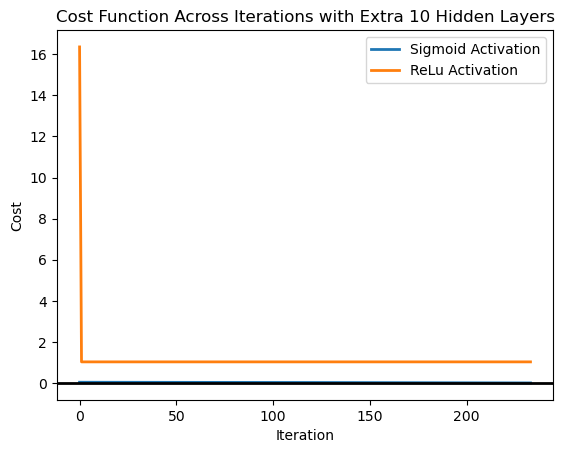

In [52]:
iterations = np.arange(iter_sigmoid_extra10)
plt.plot(iterations, cost_vals_sigmoid, linewidth = 2,)
plt.plot(iterations, cost_vals_relu, linewidth = 2)
plt.title('Cost Function Across Iterations with Extra 10 Hidden Layers')
plt.legend(['Sigmoid Activation', 'ReLu Activation'])
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.axhline(accuracyThreshold, linewidth = 2, color = "black")


#### Findings

The ReLu activation function plateaus at an even higher cost than the network with only 1 hidden layer. This phenomena 
could be due to a few reasons, one of which inclued the concept of 'dead' neurons that was mentioned in the previous findings. This issue occurs when the weights in the network are initialized to a large value, or if the learning rate (scalar) is too high.


# 1.4 Third Problem
## a. Are the topological spaces created by the sigmoid and the ReLu functions similar? 



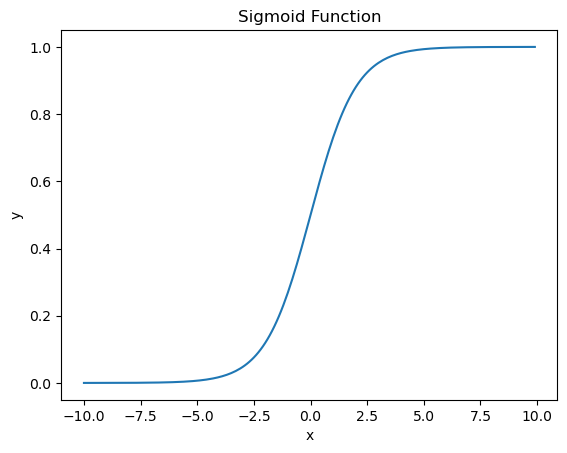

In [56]:
x = np.arange(-10, 10, 0.1)
y = 1 / (1 + np.exp(-x))    # Evaluate the sigmoid function for each x value
plt.plot(x, y)             # Plot the sigmoid function
plt.title('Sigmoid Function')  # Add a title to the plot
plt.xlabel('x')            # Add a label to the x-axis
plt.ylabel('y')            # Add a label to the y-axis
plt.show()                 # Show the plot


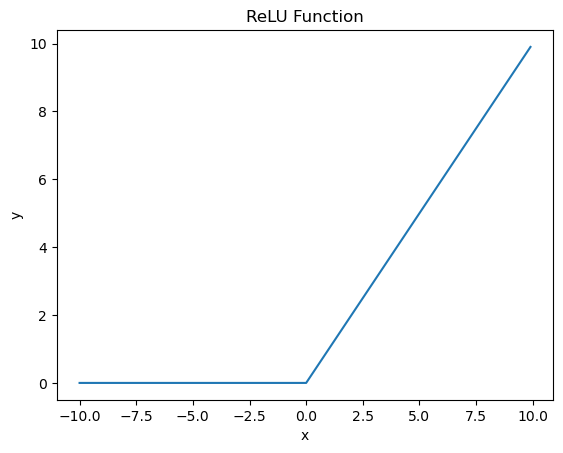

In [60]:
x = np.arange(-10, 10, 0.1)
y = np.maximum(0,x)    # Evaluate the sigmoid function for each x value
plt.plot(x, y)             # Plot the sigmoid function
plt.title('ReLU Function')  # Add a title to the plot
plt.xlabel('x')            # Add a label to the x-axis
plt.ylabel('y')            # Add a label to the y-axis
plt.show()                 # Show the plot


#### Findings
A topological space is a mathematical framework used to model the structure and properties of the input space of a neural network. 

**Sigmoid topology**

In computing a weighted sum, as you do for the steps of back propogation, the output can be any number. In order to smooth out the range of values, apply the sigmoid fucntion. The sigmoid function maps any real-valued input to a value between 0 and 1. The topology induced by this sigmoid function then, is a continuous mapping of the input space onto the interval [1, 0], where very negative inputs are close to zero; very positive inputs are close to 1 and everything else lies between. 

**ReLU Topology**

The ReLU activation function organizes inputs by maping any negative input to zero and any non-negative input to itself. This leads to a piecewise linear topology in the input space. This can lead to a more "discontinuous" topology than the sigmoid function.